In [1]:
from pathlib import Path
project_root = Path("/home/yangk/intership_2025_COSYS")

In [2]:
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
import json
import numpy as np

In [3]:
import sys

sys.path.append(str(project_root / "resource/DexiNed"))
sys.path.append(str(project_root / "src"))

from model import DexiNed
from dataset import BIPEDv2, transforms

In [4]:
biped_dataset = BIPEDv2(
    project_root / "data/BIPEDv2/BIPED/edges/imgs/train/rgbr/real/",
    project_root / "data/BIPEDv2/BIPED/edges/edge_maps/train/rgbr/real/"
)

test_dataset = BIPEDv2(
    project_root / "data/BIPEDv2/BIPED/edges/imgs/test/rgbr/",
    project_root / "data/BIPEDv2/BIPED/edges/edge_maps/test/rgbr/"
)

In [5]:
from PIL import Image
# take one example
item= biped_dataset[6]
img, x, y = Image.open(item['image_path']).convert('RGB'), item['image_tensor'], item['visibility_map']

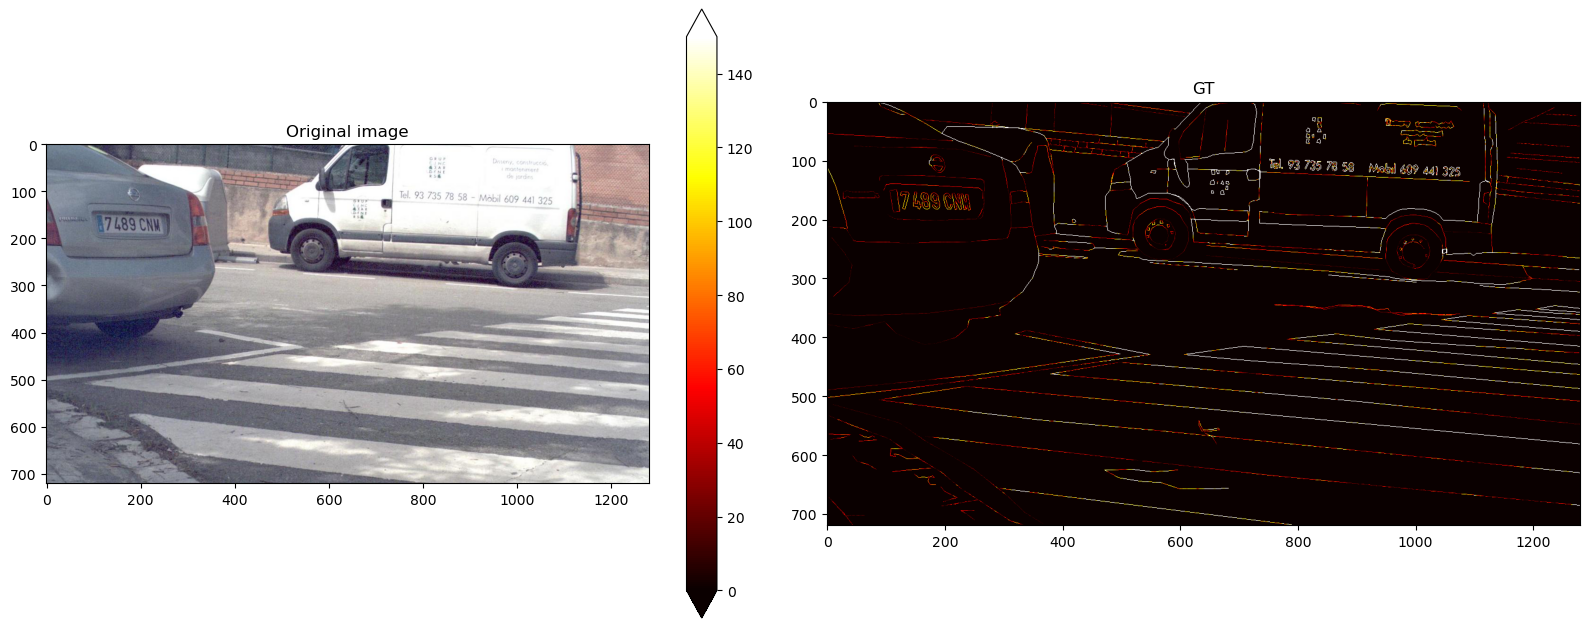

In [7]:
import matplotlib.pyplot as plt
import numpy as np

cmap_type="hot" # plasma, inferno, hot, seismic
vmin, vmax = 0, 150

# display
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

# original image
axes[0].imshow(img)
axes[0].set_title("Original image")
# axes[0,1].axis('off')  # 不显示坐标轴

im = axes[1].imshow(y, cmap=cmap_type, vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0], shrink=0.7, location='right', extend='both')
axes[1].set_title("GT")
# axes[1,1].axis('off')  # 不显示坐标轴

plt.tight_layout()  # 自动调整子图间距
plt.show()

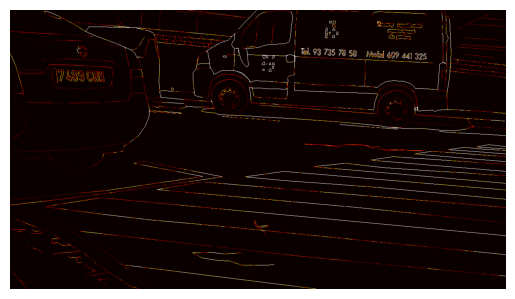

In [8]:
plt.imshow(y, cmap=cmap_type, vmin=vmin, vmax=vmax)
plt.axis("off")
# plt.colorbar(location='left', extend='both')
plt.show()

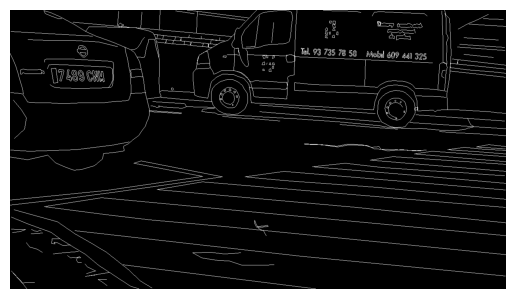

In [28]:
plt.imshow(item['edge_tensor'], cmap="gray")
plt.axis("off")
plt.show()